In [39]:
def f(x, coeff):
    '''This is a polynome generator, taking in a list of coefficients for the definition of the polynome'''
    y=sum([coefficient*(x**index) for index, coefficient in enumerate(coeff)])

    return(y)


def yges_gen(xges,a,b,n,coeff):
    
    x=a   #counter for loop
    datalist=[] #write results in this list for later plotting
    xlist=[] #write evaluated x-values in a list for the use as an axis
    step=(b-a)/(n-1)#distance between grid points

    for i in range(n): 
        #calculate successive x-values between a and b 
        #in a grid with n points.
        data=f(x, coeff)
        datalist.append(data)
        xlist.append(x)
        x+=step #In the next round calculate the neighboring x-value which has such a distance,
                #that the total amount of grid points(n) is evenly spaced inside the intervall [a,b]
    

    dist=xges-a #distance of xges from a

    stepcounter=0

    while dist>=step: #as long as the distance is longer than a step
        dist=dist-step #cut off a step from dist, till the distance is less than a step
        stepcounter+=1

    yone=datalist[stepcounter]
    xone=xlist[stepcounter]
    ytwo=datalist[stepcounter+1]
    xtwo=xlist[stepcounter+1]

    m=(yone-ytwo)/(xone-xtwo) #calculate steepness of linear polynome
    c=yone-m*xone #calculate c by inserting m into a function fo r a linear polynome

    yges=m*xges+c
            
    return(float(yges), datalist, xlist)

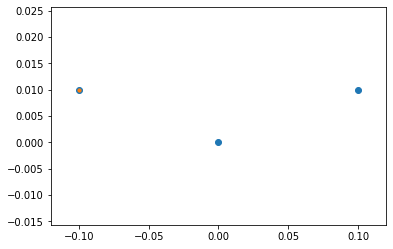

In [99]:
import numpy as np
import matplotlib. pyplot as plt

coeff=[0,0,1] #Enter coefficients for the polynome, 
         #u can enter 0 if you dont want a polynomial part with a certain power

a=-0.1 #start of intervall
b=0.1  #end of intervall
n=3  #number of gridpoints between every integer
 
i=a

xges=a #requested x-value
dotlist=[]
xdot=[]

while i<b:
    
    approx=yges_gen(xges,a,b,n,coeff)
    dotlist.append(approx[0])
    xdot.append(xges)
    xges+=step/(b-a)
    i+=step/(b-a)
    

plt.scatter(approx[2],approx[1])
plt.scatter(xdot,dotlist,s=10)